Dataset Shape: (772, 31)

First few rows:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.2

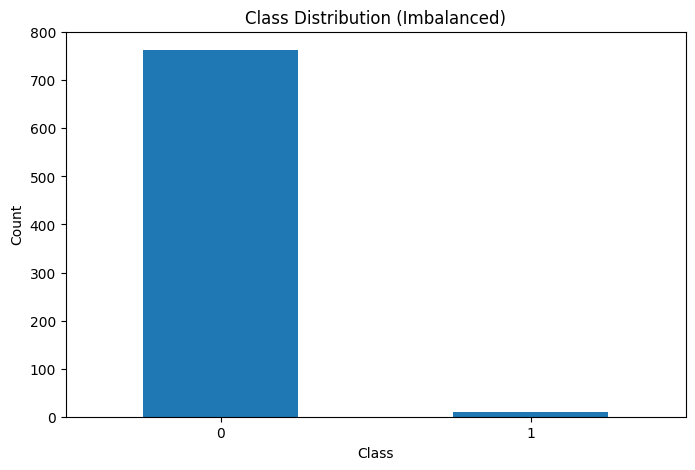

In [1]:
# Install required libraries
!pip install imbalanced-learn scikit-learn pandas numpy matplotlib seaborn

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
url = "https://raw.githubusercontent.com/AnjulaMehto/Sampling_Assignment/main/Creditcard_data.csv"
df = pd.read_csv(url)

# Display basic information
print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nClass Distribution:")
print(df['Class'].value_counts())
print("\nClass Distribution (%):")
print(df['Class'].value_counts(normalize=True) * 100)

# Visualize class imbalance
plt.figure(figsize=(8, 5))
df['Class'].value_counts().plot(kind='bar')
plt.title('Class Distribution (Imbalanced)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Original Class Distribution:
Class
0    763
1      9
Name: count, dtype: int64

Class Proportion:
Class
0    98.834197
1     1.165803
Name: proportion, dtype: float64

Before balancing:
Class 0: 763 samples
Class 1: 9 samples
Total: 772 samples

After balancing:
Class 0: 763 samples
Class 1: 763 samples
Total: 1526 samples

Balanced Dataset Shape: (1526, 31)

Balanced Class Distribution:
Class
0    763
1    763
Name: count, dtype: int64


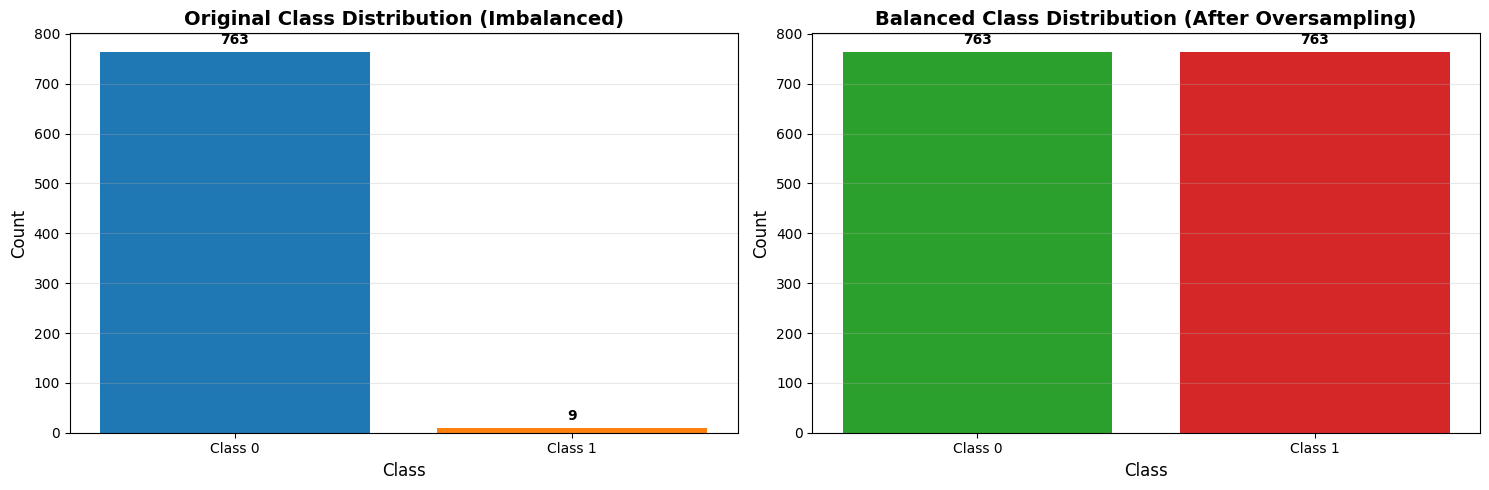


✓ Dataset successfully balanced!
✓ Visualization saved as 'class_distribution_comparison.png'


In [2]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# Check current class distribution
print("Original Class Distribution:")
print(df['Class'].value_counts())
print("\nClass Proportion:")
print(df['Class'].value_counts(normalize=True) * 100)

# Separate features and target
X = df.drop('Class', axis=1)
y = df['Class']

print("\nBefore balancing:")
print(f"Class 0: {sum(y == 0)} samples")
print(f"Class 1: {sum(y == 1)} samples")
print(f"Total: {len(y)} samples")

# Apply Random Over Sampling to balance the dataset
ros = RandomOverSampler(random_state=42)
X_balanced, y_balanced = ros.fit_resample(X, y)

print("\nAfter balancing:")
print(f"Class 0: {sum(y_balanced == 0)} samples")
print(f"Class 1: {sum(y_balanced == 1)} samples")
print(f"Total: {len(y_balanced)} samples")

# Create balanced dataframe
df_balanced = pd.DataFrame(X_balanced, columns=X.columns)
df_balanced['Class'] = y_balanced

print("\nBalanced Dataset Shape:", df_balanced.shape)
print("\nBalanced Class Distribution:")
print(df_balanced['Class'].value_counts())

# Visualize balanced dataset
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Original distribution
axes[0].bar(['Class 0', 'Class 1'], df['Class'].value_counts().sort_index(), color=['#1f77b4', '#ff7f0e'])
axes[0].set_title('Original Class Distribution (Imbalanced)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_xlabel('Class', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)

# Add count labels on bars
for i, v in enumerate(df['Class'].value_counts().sort_index()):
    axes[0].text(i, v + 10, str(v), ha='center', va='bottom', fontweight='bold')

# Balanced distribution
axes[1].bar(['Class 0', 'Class 1'], df_balanced['Class'].value_counts().sort_index(), color=['#2ca02c', '#d62728'])
axes[1].set_title('Balanced Class Distribution (After Oversampling)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Count', fontsize=12)
axes[1].set_xlabel('Class', fontsize=12)
axes[1].grid(axis='y', alpha=0.3)

# Add count labels on bars
for i, v in enumerate(df_balanced['Class'].value_counts().sort_index()):
    axes[1].text(i, v + 10, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('class_distribution_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Dataset successfully balanced!")
print("✓ Visualization saved as 'class_distribution_comparison.png'")

SAMPLE SIZE CALCULATION
Population Size: 1526
Confidence Level: 95% (Z = 1.96)
Margin of Error: 5%
Calculated Sample Size: 308

CREATING 5 DIFFERENT SAMPLES

Sample 1:
  Shape: (308, 31)
  Class 0: 163 samples
  Class 1: 145 samples
  Random State: 0

Sample 2:
  Shape: (308, 31)
  Class 0: 145 samples
  Class 1: 163 samples
  Random State: 10

Sample 3:
  Shape: (308, 31)
  Class 0: 170 samples
  Class 1: 138 samples
  Random State: 20

Sample 4:
  Shape: (308, 31)
  Class 0: 152 samples
  Class 1: 156 samples
  Random State: 30

Sample 5:
  Shape: (308, 31)
  Class 0: 164 samples
  Class 1: 144 samples
  Random State: 40

SAMPLES SUMMARY TABLE
  Sample  Total Size  Class 0  Class 1  Random State
Sample 1         308      163      145             0
Sample 2         308      145      163            10
Sample 3         308      170      138            20
Sample 4         308      152      156            30
Sample 5         308      164      144            40


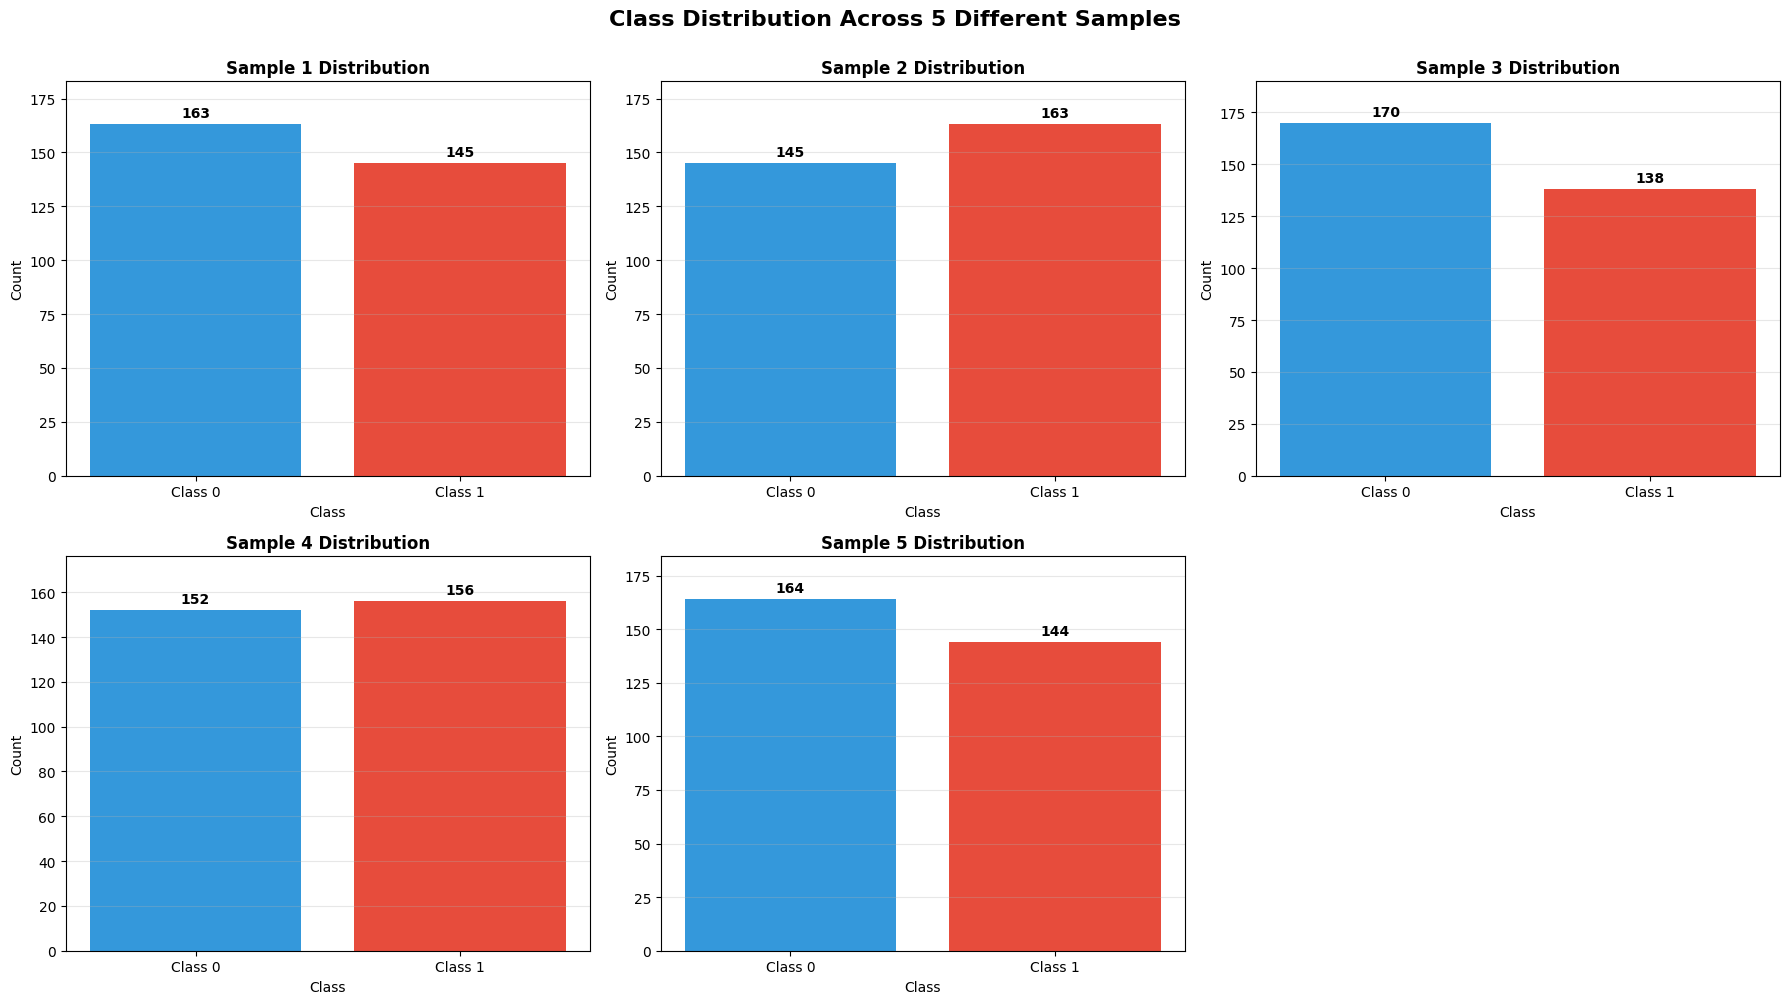


VERIFYING SAMPLE DIVERSITY
Checking if samples have different observations...
Sample 1 vs Sample 2: 57 overlapping rows (18.51%)
Sample 2 vs Sample 3: 55 overlapping rows (17.86%)
Sample 3 vs Sample 4: 52 overlapping rows (16.88%)
Sample 4 vs Sample 5: 55 overlapping rows (17.86%)

✓ Five different samples created successfully!
✓ Each sample contains 308 observations
✓ Visualization saved as 'five_samples_distribution.png'


In [3]:
import math

# Calculate sample size using Cochran's formula
def calculate_sample_size(population_size, confidence_level=1.96, margin_error=0.05):
    """
    Calculate sample size using Cochran's formula with finite population correction
    Z = 1.96 for 95% confidence level
    E = 0.05 (5% margin of error)
    p = 0.5 (maximum variability)
    """
    p = 0.5  # Maximum variability
    Z = confidence_level
    E = margin_error

    # Initial sample size (infinite population)
    n0 = (Z**2 * p * (1-p)) / (E**2)

    # Finite population correction
    n = n0 / (1 + ((n0 - 1) / population_size))

    return int(math.ceil(n))

# Calculate sample size
population_size = len(df_balanced)
sample_size = calculate_sample_size(population_size)

print("="*60)
print("SAMPLE SIZE CALCULATION")
print("="*60)
print(f"Population Size: {population_size}")
print(f"Confidence Level: 95% (Z = 1.96)")
print(f"Margin of Error: 5%")
print(f"Calculated Sample Size: {sample_size}")
print("="*60)

# Create 5 different samples with different random states
samples = []
sample_info = []

print("\n" + "="*60)
print("CREATING 5 DIFFERENT SAMPLES")
print("="*60)

for i in range(5):
    # Use different random state for each sample to ensure diversity
    sample = df_balanced.sample(n=sample_size, random_state=i*10)
    samples.append(sample)

    # Get class distribution for each sample
    class_dist = sample['Class'].value_counts().sort_index()

    sample_info.append({
        'Sample': f'Sample {i+1}',
        'Total Size': len(sample),
        'Class 0': class_dist[0],
        'Class 1': class_dist[1],
        'Random State': i*10
    })

    print(f"\nSample {i+1}:")
    print(f"  Shape: {sample.shape}")
    print(f"  Class 0: {class_dist[0]} samples")
    print(f"  Class 1: {class_dist[1]} samples")
    print(f"  Random State: {i*10}")

# Create a summary DataFrame
samples_summary = pd.DataFrame(sample_info)
print("\n" + "="*60)
print("SAMPLES SUMMARY TABLE")
print("="*60)
print(samples_summary.to_string(index=False))

# Visualize all samples
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for i in range(5):
    class_counts = samples[i]['Class'].value_counts().sort_index()
    axes[i].bar(['Class 0', 'Class 1'], class_counts, color=['#3498db', '#e74c3c'])
    axes[i].set_title(f'Sample {i+1} Distribution', fontsize=12, fontweight='bold')
    axes[i].set_ylabel('Count', fontsize=10)
    axes[i].set_xlabel('Class', fontsize=10)
    axes[i].set_ylim([0, max(class_counts) + 20])
    axes[i].grid(axis='y', alpha=0.3)

    # Add count labels
    for j, v in enumerate(class_counts):
        axes[i].text(j, v + 2, str(v), ha='center', va='bottom', fontweight='bold')

# Remove the 6th subplot
fig.delaxes(axes[5])

plt.suptitle('Class Distribution Across 5 Different Samples', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.savefig('five_samples_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# Verify samples are different
print("\n" + "="*60)
print("VERIFYING SAMPLE DIVERSITY")
print("="*60)
print("Checking if samples have different observations...")

for i in range(4):
    # Compare consecutive samples
    sample1_indices = set(samples[i].index)
    sample2_indices = set(samples[i+1].index)

    # Calculate overlap
    overlap = len(sample1_indices.intersection(sample2_indices))
    overlap_percent = (overlap / sample_size) * 100

    print(f"Sample {i+1} vs Sample {i+2}: {overlap} overlapping rows ({overlap_percent:.2f}%)")

print("\n✓ Five different samples created successfully!")
print(f"✓ Each sample contains {sample_size} observations")
print("✓ Visualization saved as 'five_samples_distribution.png'")

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

# ============================================================================
# STEP 4: Define Sampling Techniques
# ============================================================================

class SamplingTechniques:
    """Class containing different sampling techniques"""

    @staticmethod
    def simple_random_sampling(data, sample_size, random_state=42):
        """Sampling1: Simple Random Sampling"""
        return data.sample(n=sample_size, random_state=random_state)

    @staticmethod
    def systematic_sampling(data, sample_size):
        """Sampling2: Systematic Sampling"""
        data_reset = data.reset_index(drop=True)
        step = len(data_reset) // sample_size
        if step == 0:
            step = 1
        indices = np.arange(0, len(data_reset), step)[:sample_size]
        return data_reset.iloc[indices]

    @staticmethod
    def stratified_sampling(data, sample_size, random_state=42):
        """Sampling3: Stratified Sampling based on target class"""
        try:
            _, sample = train_test_split(
                data,
                test_size=sample_size/len(data),
                stratify=data['Class'],
                random_state=random_state
            )
            return sample
        except:
            # Fallback to simple random if stratification fails
            return data.sample(n=sample_size, random_state=random_state)

    @staticmethod
    def cluster_sampling(data, sample_size, n_clusters=5, random_state=42):
        """Sampling4: Cluster Sampling"""
        X = data.drop('Class', axis=1)

        # Create clusters
        kmeans = KMeans(n_clusters=n_clusters, random_state=random_state, n_init=10)
        data_copy = data.copy().reset_index(drop=True)
        data_copy['Cluster'] = kmeans.fit_predict(X)

        # Randomly select some clusters
        np.random.seed(random_state)
        n_selected_clusters = max(1, n_clusters // 2)
        selected_clusters = np.random.choice(
            n_clusters,
            size=n_selected_clusters,
            replace=False
        )

        # Get samples from selected clusters
        sampled_data = data_copy[data_copy['Cluster'].isin(selected_clusters)]
        sampled_data = sampled_data.drop('Cluster', axis=1)

        # Adjust sample size if needed
        if len(sampled_data) > sample_size:
            sampled_data = sampled_data.sample(n=sample_size, random_state=random_state)
        elif len(sampled_data) < sample_size:
            # If not enough samples, add more from remaining data
            remaining = data_copy[~data_copy['Cluster'].isin(selected_clusters)]
            remaining = remaining.drop('Cluster', axis=1)
            additional_needed = sample_size - len(sampled_data)
            if len(remaining) >= additional_needed:
                additional = remaining.sample(n=additional_needed, random_state=random_state)
                sampled_data = pd.concat([sampled_data, additional])

        return sampled_data.reset_index(drop=True)

    @staticmethod
    def bootstrap_sampling(data, sample_size, random_state=42):
        """Sampling5: Bootstrap Sampling (with replacement)"""
        return data.sample(n=sample_size, replace=True, random_state=random_state)

# ============================================================================
# STEP 5: Define ML Models
# ============================================================================

models = {
    'M1': ('Logistic Regression', LogisticRegression(max_iter=1000, random_state=42)),
    'M2': ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    'M3': ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    'M4': ('SVM', SVC(kernel='rbf', random_state=42)),
    'M5': ('KNN', KNeighborsClassifier(n_neighbors=5))
}

sampling_techniques = {
    'Sampling1': ('Simple Random', SamplingTechniques.simple_random_sampling),
    'Sampling2': ('Systematic', SamplingTechniques.systematic_sampling),
    'Sampling3': ('Stratified', SamplingTechniques.stratified_sampling),
    'Sampling4': ('Cluster', SamplingTechniques.cluster_sampling),
    'Sampling5': ('Bootstrap', SamplingTechniques.bootstrap_sampling)
}

print("="*70)
print("SAMPLING TECHNIQUES AND ML MODELS")
print("="*70)
print("\nSampling Techniques:")
for key, (name, _) in sampling_techniques.items():
    print(f"  {key}: {name} Sampling")

print("\nMachine Learning Models:")
for key, (name, _) in models.items():
    print(f"  {key}: {name}")
print("="*70)

SAMPLING TECHNIQUES AND ML MODELS

Sampling Techniques:
  Sampling1: Simple Random Sampling
  Sampling2: Systematic Sampling
  Sampling3: Stratified Sampling
  Sampling4: Cluster Sampling
  Sampling5: Bootstrap Sampling

Machine Learning Models:
  M1: Logistic Regression
  M2: Decision Tree
  M3: Random Forest
  M4: SVM
  M5: KNN


In [5]:
# ============================================================================
# STEP 6: Train and Evaluate Models
# ============================================================================

# Results storage
results = {model_name: {sampling_name: [] for sampling_name in sampling_techniques.keys()}
           for model_name in models.keys()}

detailed_results = []

print("\n" + "="*70)
print("TRAINING AND EVALUATION")
print("="*70)

# Calculate a smaller sample size for faster training
training_sample_size = min(200, sample_size)  # Use smaller size for faster execution

# Iterate through each of the 5 samples
for sample_idx, sample_data in enumerate(samples):
    print(f"\n{'='*70}")
    print(f"PROCESSING SAMPLE {sample_idx + 1}/5")
    print(f"{'='*70}")

    # Apply each sampling technique
    for sampling_name, (sampling_desc, sampling_func) in sampling_techniques.items():
        print(f"\n  Applying {sampling_name} ({sampling_desc})...")

        try:
            # Apply sampling technique
            if sampling_name == 'Sampling2':  # Systematic doesn't need random_state
                sampled_data = sampling_func(sample_data, training_sample_size)
            else:
                sampled_data = sampling_func(sample_data, training_sample_size, random_state=42)

            # Prepare data
            X_sample = sampled_data.drop('Class', axis=1)
            y_sample = sampled_data['Class']

            # Check if we have both classes
            if len(y_sample.unique()) < 2:
                print(f"    ⚠ Warning: Only one class present in sample, skipping...")
                continue

            # Split data (80-20 split)
            X_train, X_test, y_train, y_test = train_test_split(
                X_sample, y_sample, test_size=0.2, random_state=42, stratify=y_sample
            )

            # Train and evaluate each model
            for model_name, (model_desc, model) in models.items():
                try:
                    # Clone model
                    from sklearn.base import clone
                    model_clone = clone(model)

                    # Train
                    model_clone.fit(X_train, y_train)

                    # Predict
                    y_pred = model_clone.predict(X_test)

                    # Calculate accuracy
                    accuracy = accuracy_score(y_test, y_pred) * 100

                    # Store results
                    results[model_name][sampling_name].append(accuracy)

                    detailed_results.append({
                        'Sample': f'Sample {sample_idx + 1}',
                        'Sampling': sampling_name,
                        'Model': model_name,
                        'Accuracy': accuracy
                    })

                    print(f"    {model_name} ({model_desc}): {accuracy:.2f}%")

                except Exception as e:
                    print(f"    ⚠ Error with {model_name}: {str(e)}")
                    continue

        except Exception as e:
            print(f"  ⚠ Error with {sampling_name}: {str(e)}")
            continue

print("\n" + "="*70)
print("TRAINING COMPLETED!")
print("="*70)


TRAINING AND EVALUATION

PROCESSING SAMPLE 1/5

  Applying Sampling1 (Simple Random)...
    M1 (Logistic Regression): 97.50%
    M2 (Decision Tree): 97.50%
    M3 (Random Forest): 97.50%
    M4 (SVM): 77.50%
    M5 (KNN): 90.00%

  Applying Sampling2 (Systematic)...
    M1 (Logistic Regression): 90.00%
    M2 (Decision Tree): 95.00%
    M3 (Random Forest): 100.00%
    M4 (SVM): 60.00%
    M5 (KNN): 92.50%

  Applying Sampling3 (Stratified)...
    M1 (Logistic Regression): 90.00%
    M2 (Decision Tree): 95.00%
    M3 (Random Forest): 100.00%
    M4 (SVM): 62.50%
    M5 (KNN): 90.00%

  Applying Sampling4 (Cluster)...
    M1 (Logistic Regression): 90.00%
    M2 (Decision Tree): 95.00%
    M3 (Random Forest): 97.50%
    M4 (SVM): 65.00%
    M5 (KNN): 90.00%

  Applying Sampling5 (Bootstrap)...
    M1 (Logistic Regression): 90.00%
    M2 (Decision Tree): 97.50%
    M3 (Random Forest): 100.00%
    M4 (SVM): 80.00%
    M5 (KNN): 90.00%

PROCESSING SAMPLE 2/5

  Applying Sampling1 (Simple Ra

In [6]:
# ============================================================================
# STEP 7: Calculate Average Results
# ============================================================================

print("\n" + "="*70)
print("CALCULATING FINAL RESULTS")
print("="*70)

# Calculate average accuracy across all samples
final_results = {}
for model_name in models.keys():
    final_results[model_name] = {}
    for sampling_name in sampling_techniques.keys():
        if len(results[model_name][sampling_name]) > 0:
            avg_accuracy = np.mean(results[model_name][sampling_name])
            final_results[model_name][sampling_name] = round(avg_accuracy, 2)
        else:
            final_results[model_name][sampling_name] = 0.0

# Create results DataFrame
results_df = pd.DataFrame(final_results).T
results_df.index.name = 'Model'

print("\n" + "="*70)
print("FINAL RESULTS TABLE (Average Accuracy %)")
print("="*70)
print(results_df.to_string())

# Save results
results_df.to_csv('sampling_results.csv')
print("\n✓ Results saved to 'sampling_results.csv'")

# Create detailed results DataFrame
detailed_df = pd.DataFrame(detailed_results)
detailed_df.to_csv('detailed_results.csv', index=False)
print("✓ Detailed results saved to 'detailed_results.csv'")


CALCULATING FINAL RESULTS

FINAL RESULTS TABLE (Average Accuracy %)
       Sampling1  Sampling2  Sampling3  Sampling4  Sampling5
Model                                                       
M1          89.5       89.0       92.5       89.5       90.5
M2          97.5       96.0       95.0       96.0       97.0
M3          99.5       99.0      100.0       99.5       99.5
M4          76.0       66.5       68.0       64.5       74.0
M5          90.5       88.0       89.0       88.0       91.5

✓ Results saved to 'sampling_results.csv'
✓ Detailed results saved to 'detailed_results.csv'



WHICH SAMPLING TECHNIQUE GIVES HIGHER ACCURACY ON WHICH MODEL

Results Table (Accuracy %):
       Sampling1  Sampling2  Sampling3  Sampling4  Sampling5
Model                                                       
M1          89.5       89.0       92.5       89.5       90.5
M2          97.5       96.0       95.0       96.0       97.0
M3          99.5       99.0      100.0       99.5       99.5
M4          76.0       66.5       68.0       64.5       74.0
M5          90.5       88.0       89.0       88.0       91.5

BEST SAMPLING FOR EACH MODEL:
M1: Sampling3 with 92.50% accuracy
M2: Sampling1 with 97.50% accuracy
M3: Sampling3 with 100.00% accuracy
M4: Sampling1 with 76.00% accuracy
M5: Sampling5 with 91.50% accuracy

OVERALL BEST COMBINATION:
Model: M3, Sampling: Sampling3, Accuracy: 100.00%


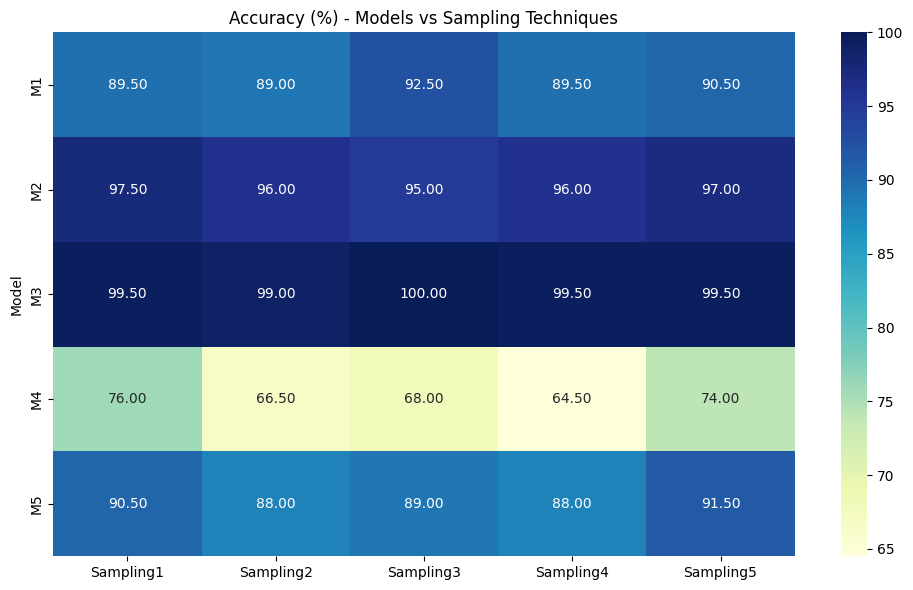

In [8]:
# ============================================================================
# STEP 8: DETERMINE BEST SAMPLING TECHNIQUE FOR EACH MODEL
# ============================================================================

print("\n" + "="*80)
print("WHICH SAMPLING TECHNIQUE GIVES HIGHER ACCURACY ON WHICH MODEL")
print("="*80)

# Display results table
print("\nResults Table (Accuracy %):")
print(results_df)

print("\n" + "="*80)
print("BEST SAMPLING FOR EACH MODEL:")
print("="*80)

# Find best sampling for each model
for model in results_df.index:
    best_sampling = results_df.loc[model].idxmax()
    best_accuracy = results_df.loc[model].max()
    print(f"{model}: {best_sampling} with {best_accuracy:.2f}% accuracy")

print("\n" + "="*80)
print("OVERALL BEST COMBINATION:")
print("="*80)

# Find overall best
best_combo = results_df.stack().idxmax()
best_acc = results_df.stack().max()
print(f"Model: {best_combo[0]}, Sampling: {best_combo[1]}, Accuracy: {best_acc:.2f}%")

# Simple visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(results_df, annot=True, fmt='.2f', cmap='YlGnBu')
plt.title('Accuracy (%) - Models vs Sampling Techniques')
plt.tight_layout()
plt.show()